# Main

In [1]:
## Base Library
!pip install inferactively-pymdp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 304 kB/s 
     |████████████████████████████████| 149 kB 16.2 MB/s 
     |████████████████████████████████| 3.1 MB 52.1 MB/s 
     |████████████████████████████████| 2.8 MB 37.6 MB/s 
     |████████████████████████████████| 154 kB 60.0 MB/s 
     |████████████████████████████████| 76 kB 3.6 MB/s 
     |████████████████████████████████| 298 kB 72.4 MB/s 
     |████████████████████████████████| 57 kB 4.8 MB/s 
     |████████████████████████████████| 71 kB 155 kB/s 
     |████████████████████████████████| 3.2 MB 45.0 MB/s 
     |████████████████████████████████| 70 kB 6.9 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 100 kB 7.4 MB/s 
     |████████████████████████████████| 121 kB 5

In [2]:
import numpy as np
from pymdp import utils,maths
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import display, Latex

In [3]:
## Input Data Format -> Project name,skills required & skills for people in DAO


project = {
    "name": "Project voodoo",
    
    # skills needed out of 5 stars
    "project_skills":{
        "Python": 4,
        "Cognitve modeling": 4,
        "Statistics":3,
        "Probability":4,
        "Software packaging": 3,
        "Research aptitude": 5,
        "Machine learning": 3
    }
}


DAO_people = [
    
    {
    "name": "Aryan",
    # skills out of 5 stars
    "skills":{
        "Python": 2,
        "Software packaging": 3,
        "Dev-Ops":4,
        "Solidity":4     
      }
    },

    {
    "name": "Amit",
    "skills":{
        "Python": 4,
        "Cognitve modeling": 5,
        "Statistics":5,
        "Probability":4,
        "Software packaging": 3,
        "Machine learning": 4,
        "Open-source":4,     
        "Research aptitude": 5
      }
    },

    {
    "name": "Tushar",
    # skills out of 5 stars
    "skills":{
        "Python": 5,
        "Backend overall": 5,
        "Dev-Ops":4,
        "Frontend overall": 3,
        "React JS": 3,
        "Pipeline automation": 4,     
        "Software packaging": 5
      }
    },

    {
    "name": "Shashwat",
    "skills":{
        "Python": 1,
        "Backend overall": 1,
        "Frontend overall": 4,
        "React JS": 5,
        "UI": 3,     
        "Software packaging": 3
      }
    },

    {
    "name": "Shashwat",
    "skills":{
        "Python": 1,
        "Backend overall": 1,
        "Frontend overall": 4,
        "React JS": 5,
        "UI": 3,     
        "Software packaging": 3
      }
    },

    {
    "name": "Varun",
    "skills":{
        "Python": 1,
        "Backend overall": 2,
        "Frontend overall": 3,
        "React JS": 3,
        "Flutter": 5,
        "UI": 4,     
        "Software packaging": 4,
      }
    },

    {
    "name": "Dhruv",
    "skills":{
        "Python": 2,
        "UI": 5,
        "Design":5,
        "Ops":5,
        "Product management": 5,
        "Machine learning": 3  
      }
    },

    {
    "name": "Devansh",
    "skills":{
        "Python": 1,
        "UI": 4,
        "Design": 4,
        "Product management": 5,
        "Solidity": 3,
        "Systems design": 4  
      }
    },

    {
    "name": "Shikhar",
    "skills":{
        "Mechanical engineering": 5,
        "Classical mechanics": 4,
        "Sales-ops": 5
      }
    }
]

In [4]:
observation = 0
prior = np.array([0.5, 0.5]) # dummy example

likelihood_dist = np.array([ [0.8, 0.2],
                             [0.2, 0.8] ])

def variational_free_energy(prior, likelihood_dist):

  joint_prob = likelihood_dist * prior # element-wise product of the likelihood of each hidden state, given the observation, with the prior probability assigned to each hidden state
  p_o = joint_prob.sum()

  try:
    posterior = joint_prob / p_o
    surprise = -np.log(p_o)
    return surprise.round(3)

  except:
    return None


In [5]:
# App.py

skill_rows = []
for person in DAO_people:
  matched_skills = {k : person['skills'][k] if k in person['skills'] else 0 for k in project['project_skills']}
  skill_values = list(matched_skills.values())
  skill_values.insert(0,person['name'])
  skill_rows += [skill_values]  

labels = ['Name']
labels += [name for name in (project['project_skills'].keys())]
df = pd.DataFrame(columns=[labels], data=skill_rows)

df

## Here's how people stack up against Project required skills

,Name,Python,Cognitve modeling,Statistics,Probability,Software packaging,Research aptitude,Machine learning
0,Aryan,2,0,0,0,3,0,0
1,Amit,4,5,5,4,3,5,4
2,Tushar,5,0,0,0,5,0,0
3,Shashwat,1,0,0,0,3,0,0
4,Shashwat,1,0,0,0,3,0,0
5,Varun,1,0,0,0,4,0,0
6,Dhruv,2,0,0,0,0,0,3
7,Devansh,1,0,0,0,0,0,0
8,Shikhar,0,0,0,0,0,0,0


In [6]:
prior = np.array(list(map(lambda element: element/5, list((project['project_skills'].values())))))

FE_analysis = []
FEs = {}
for idx,person in df.iterrows():
  likelihood = np.array(person.iloc[1:,]/5)
  FE = variational_free_energy(prior, likelihood)
  FEs[person['Name']] = FE

  FE_results = {"Name": person['Name'], "FE value": FE, "L matrix": likelihood}
  FE_analysis.append(FE_results)

FE_analysis

[{'Name': 'Aryan',
  'FE value': 0.386,
  'L matrix': array([0.4, 0.0, 0.0, 0.0, 0.6, 0.0, 0.0], dtype=object)},
 {'Name': 'Amit',
  'FE value': -1.509,
  'L matrix': array([0.8, 1.0, 1.0, 0.8, 0.6, 1.0, 0.8], dtype=object)},
 {'Name': 'Tushar',
  'FE value': -0.336,
  'L matrix': array([1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], dtype=object)},
 {'Name': 'Shashwat',
  'FE value': 0.654,
  'L matrix': array([0.2, 0.0, 0.0, 0.0, 0.6, 0.0, 0.0], dtype=object)},
 {'Name': 'Shashwat',
  'FE value': 0.654,
  'L matrix': array([0.2, 0.0, 0.0, 0.0, 0.6, 0.0, 0.0], dtype=object)},
 {'Name': 'Varun',
  'FE value': 0.446,
  'L matrix': array([0.2, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0], dtype=object)},
 {'Name': 'Dhruv',
  'FE value': 0.386,
  'L matrix': array([0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6], dtype=object)},
 {'Name': 'Devansh',
  'FE value': 1.833,
  'L matrix': array([0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)},
 {'Name': 'Shikhar',
  'FE value': None,
  'L matrix': array([0.0, 0.0, 0.0, 0.0, 0.0,

In [7]:
FEs

{'Aryan': 0.386,
 'Amit': -1.509,
 'Tushar': -0.336,
 'Shashwat': 0.654,
 'Varun': 0.446,
 'Dhruv': 0.386,
 'Devansh': 1.833,
 'Shikhar': None}

In [9]:
# Removing None FE valued members (Sorry!)

FEs = {k: v for k, v in FEs.items() if v is not None}

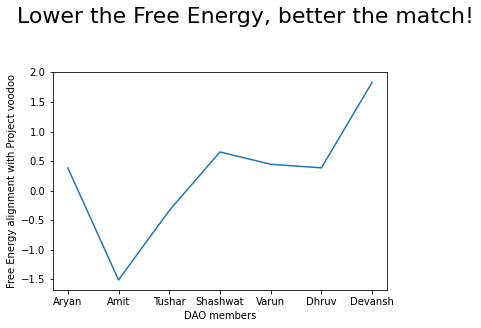

In [10]:
x, y = zip(*FEs.items()) 
plt.plot(x, y)
plt.xlabel("DAO members")
plt.ylabel(f"Free Energy alignment with {project['name']}")
plt.text(-1, max(list(FEs.values()))+1, "Lower the Free Energy, better the match!", fontsize = 22)
plt.show()

## People with no FE (None in Python) will be excluded from the plot

In [11]:
# Selecting most aligned people with top_n paramters (int)

def FE_threshold(FEs, top_n):
  sorted_FEs = dict(sorted(FEs.items(), key=lambda item: item[1]))
  top_n_people = {k: sorted_FEs[k] for k in list(sorted_FEs)[:top_n]}

  return top_n_people

WITHIN_GATE_PEOPLE = FE_threshold(FEs, 5)
WITHIN_GATE_PEOPLE
## Yay the squad is formed! Here are the members with their Free-Energies

{'Amit': -1.509,
 'Tushar': -0.336,
 'Aryan': 0.386,
 'Dhruv': 0.386,
 'Varun': 0.446}

In [12]:
# Defining Information theoritic KL divergence between two skill distributions in bits. This wil be useful later

def get_KL(p_skills, q_skills):
  # log(negative or 0) leads to -infinity, therefore replacing by infinitesimal values, 
  # this will change bit value slightly but all by constant degree, hence order will remain intact  
  p_skills = np.where(p_skills > np.exp(-100), p_skills, np.exp(-10))
  q_skills = np.where(q_skills > np.exp(-100), q_skills, np.exp(-10))

  try:
    return sum(p_skills[i] * np.log2(p_skills[i]/q_skills[i]) for i in range(len(p_skills)))

  except:
    return "Not valid distribution(s). Try changing the values."

get_KL(FE_analysis[0]['L matrix'], FE_analysis[1]['L matrix'])

-0.40324568165045926

In [13]:
# Defining Degree of symmetry between two vectors as their . product

def get_symmetry(p_skills,q_skills, degree):
  aligned = np.dot(p_skills,q_skills)
  degree_of_symmetry = degree*aligned
  return degree_of_symmetry

get_symmetry(FE_analysis[3]['L matrix'], FE_analysis[-2]['L matrix'], 1)

0.04000000000000001

In [14]:
# Finding partners / Forming sub-squads

def find_partners(searchee_name, degree_of_symmetry):
  searchee_skills = list(filter(lambda person: person['Name'] == searchee_name, FE_analysis))[0]['L matrix']

  suited_partners = {}
  for peep in FE_analysis:
    if peep['FE value']!=None and peep['Name']!=searchee_name:
      peep_skills = peep['L matrix']
      
      KL = get_KL(searchee_skills, peep_skills)
      DOS = get_symmetry(searchee_skills, peep_skills, degree_of_symmetry)
      
      suited_partners[peep['Name']] = KL + DOS
  return dict(sorted(suited_partners.items(), key=lambda item: item[1]))

find_partners('Aryan',1) 

{'Tushar': 0.02904940554533142,
 'Amit': 0.2767543183495408,
 'Varun': 0.7109775004326937,
 'Shashwat': 0.8400000000000001,
 'Dhruv': 8.373369364485018,
 'Devansh': 8.693990888834056}

# Misc

In [ ]:
## Better way to print matrices (Taken from original PyMDP implementation)

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")



In [ ]:
observation = 0

prior = np.array([0.5, 0.5]) # simply set it by hand

likelihood_dist = np.array([ [0.8, 0.2],
                        [0.2, 0.8] ])
likelihood_s = likelihood_dist[observation,:] 

joint_prob = likelihood_s * prior # element-wise product of the likelihood of each hidden state, given the observation, with the prior probability assigned to each hidden state
p_o = joint_prob.sum()
posterior = joint_prob / p_o
surprise = - np.log(p_o)


print(f'Observation:{observation}\n')
print(f'Prior:{prior}\n')
print('Likelihood:')
matprint(likelihood_dist)